<a href="https://colab.research.google.com/github/Ilmaj17/Netflix_TVShow_Rating/blob/main/Netflix_TVShow_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###Importing the data set

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/netflix.csv')
df.head(20)

,Unnamed: 0,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
5,5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
6,6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.0,80
7,7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2017,91.0,80
8,8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,110,2015,98.0,80
9,9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,96.0,80


###Understanding the data set

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.columns
df = df.drop(['Unnamed: 0','title','release year'],axis=1)
df.columns

Index(['rating', 'ratingLevel', 'ratingDescription', 'user rating score',
       'user rating size'],
      dtype='object')

In [ ]:
col = df.columns
for c in col:
  print(c, df[c].nunique())

rating 13
ratingLevel 99
ratingDescription 11
user rating score 42
user rating size 3


In [ ]:
for c in col:
  print(c, df[c].isnull().sum())

rating 0
ratingLevel 59
ratingDescription 0
user rating score 395
user rating size 0


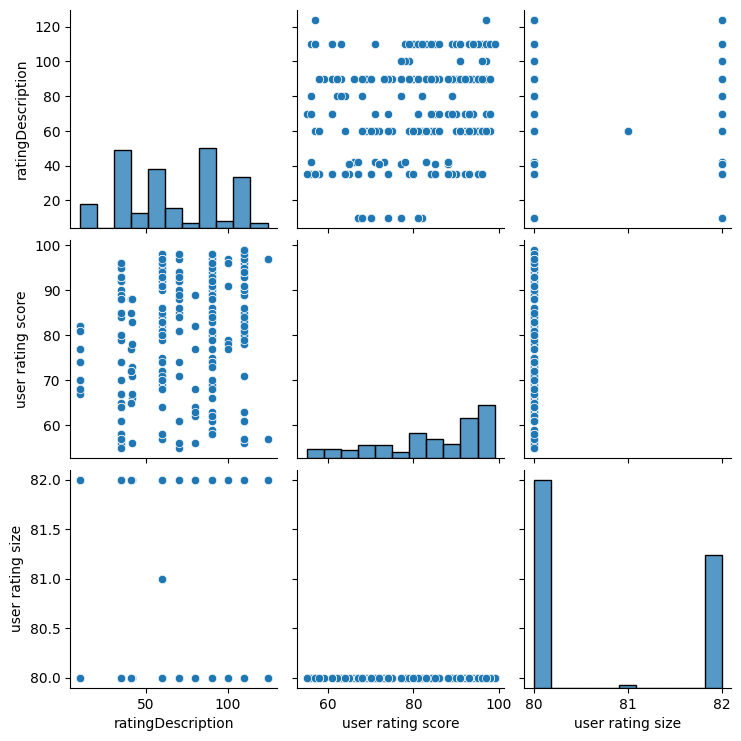

In [ ]:
sns.pairplot(df[col])
plt.show()

##Data Preprocessing
###Fill the null values and convert the categorical data into numerical data

In [ ]:
df.dtypes

rating                object
ratingLevel           object
ratingDescription      int64
user rating score    float64
user rating size       int64
dtype: object

In [ ]:
cat_feature = [f for f in df.columns if df[f].dtypes == 'object']
cat_feature

['rating', 'ratingLevel']

In [ ]:
for f in cat_feature:
      df[f].fillna('Missing', inplace =True)
for f in cat_feature:
  print(f," ", df[f].isnull().sum())

rating   0
ratingLevel   0


In [ ]:
int_feature = [f for f in df.columns if df[f].dtypes != 'object']
int_feature

['ratingDescription', 'user rating score', 'user rating size']

In [ ]:
for f in int_feature:
  mean_value = df[f].mean()
  df[f+'_nan'] = df[f].isnull().astype(int) #True - 1 False - 0
  df[f].fillna(mean_value, inplace=True)
  print(f, " mean ", mean_value)

ratingDescription  mean  67.366
user rating score  mean  84.09421487603306
user rating size  mean  80.783


In [ ]:
df

,rating,ratingLevel,ratingDescription,user rating score,user rating size,ratingDescription_nan,user rating score_nan,user rating size_nan
0,PG-13,"crude and sexual humor, language and some drug...",80,82.000000,80,0,0,0
1,R,"strong violence, sexual content and adult lang...",100,84.094215,82,0,1,0
2,TV-14,Parents strongly cautioned. May be unsuitable ...,90,98.000000,80,0,0,0
3,TV-14,Parents strongly cautioned. May be unsuitable ...,90,98.000000,80,0,0,0
4,TV-PG,Parental guidance suggested. May not be suitab...,70,94.000000,80,0,0,0
...,...,...,...,...,...,...,...,...
995,PG,"for action/peril, some scary moments and brief...",60,97.000000,80,0,0,0
996,PG,for action and some rude humor,60,84.094215,81,0,1,0
997,TV-G,Suitable for all ages.,35,84.094215,82,0,1,0
998,TV-G,Suitable for all ages.,35,84.094215,82,0,1,0


In [ ]:
for f in int_feature:
  print(f, " ", df[f].isnull().sum())

ratingDescription   0
user rating score   0
user rating size   0


ratingDescription -0.10857028143626474


<ipython-input-62-35bd7f7212a8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[f])


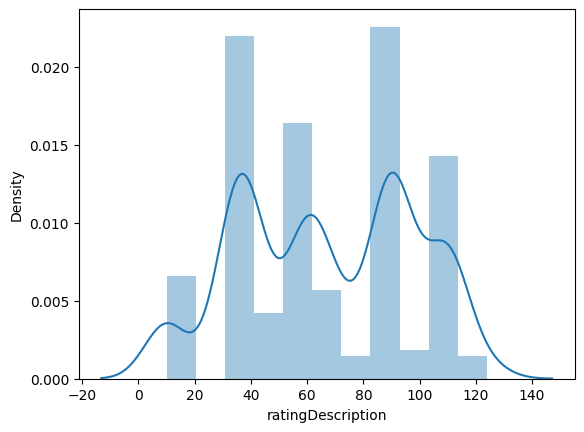

user rating score -0.9304269574014868


<ipython-input-62-35bd7f7212a8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[f])


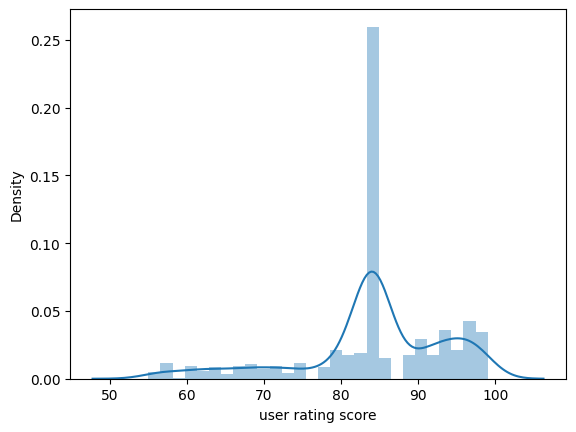

user rating size 0.44458485308497947


<ipython-input-62-35bd7f7212a8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[f])


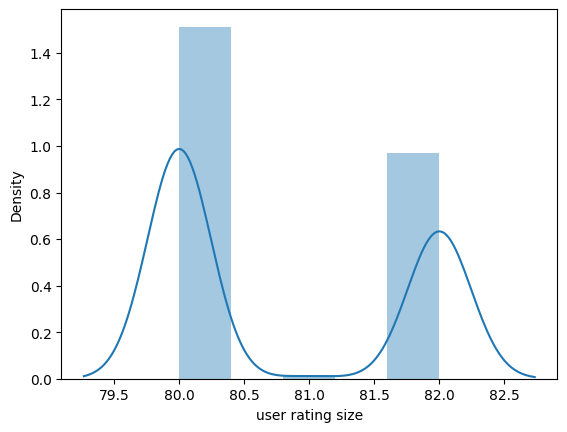

In [ ]:
from scipy.stats import skew
for f in int_feature:
  print(f, skew(df[f]))
  plt.figure()
  sns.distplot(df[f])
  plt.show()

###Let's try to apply log transformation to the numerical columns to remove the skewness

In [ ]:
df.head()

,rating,ratingLevel,ratingDescription,user rating score,user rating size,ratingDescription_nan,user rating score_nan,user rating size_nan
0,PG-13,"crude and sexual humor, language and some drug...",80,82.000000,80,0,0,0
1,R,"strong violence, sexual content and adult lang...",100,84.094215,82,0,1,0
2,TV-14,Parents strongly cautioned. May be unsuitable ...,90,98.000000,80,0,0,0
3,TV-14,Parents strongly cautioned. May be unsuitable ...,90,98.000000,80,0,0,0
4,TV-PG,Parental guidance suggested. May not be suitab...,70,94.000000,80,0,0,0


In [ ]:
for f in int_feature:
  df[f] = np.sqrt(df[f])
df.head()

,rating,ratingLevel,ratingDescription,user rating score,user rating size,ratingDescription_nan,user rating score_nan,user rating size_nan
0,PG-13,"crude and sexual humor, language and some drug...",8.944272,9.055385,8.944272,0,0,0
1,R,"strong violence, sexual content and adult lang...",10.000000,9.170290,9.055385,0,1,0
2,TV-14,Parents strongly cautioned. May be unsuitable ...,9.486833,9.899495,8.944272,0,0,0
3,TV-14,Parents strongly cautioned. May be unsuitable ...,9.486833,9.899495,8.944272,0,0,0
4,TV-PG,Parental guidance suggested. May not be suitab...,8.366600,9.695360,8.944272,0,0,0


In [ ]:
for f in int_feature:
  print(f, skew(df[f]))

ratingDescription -0.5936307117694638
user rating score -1.1156705813459955
user rating size 0.44451491700073265


###Converting categorical data in numerical values

In [ ]:
for f in cat_feature:
  print(f, len(df[f].unique()))

rating 13
ratingLevel 100


In [ ]:
for f in cat_feature:
  value_counts = df[f].value_counts().to_dict()
  for l in value_counts:
    if(value_counts[l] == 1):
      print(f, " ", l)

rating   UR
ratingLevel   language, some comic violence and mild sex-related humor
ratingLevel   mild language and action sequences
ratingLevel   mild language and comic action
ratingLevel   some scary images and action, and brief mild language
ratingLevel   violence and menacing action, rude humor, suggestive content and thematic elements
ratingLevel   some mild action
ratingLevel   some mild language and rough hockey action
ratingLevel   action sequences and peril
ratingLevel   action violence
ratingLevel   some mild, rude humor
ratingLevel   brief mild language and some rude behavior
ratingLevel   some reckless behavior
ratingLevel   some mild thematic elements
ratingLevel   some rude language and pranks
ratingLevel   crude and sexual humor, language and some drug content
ratingLevel   scary and intense creature action and images, and for some rude humor
ratingLevel   action violence, language and rude humor
ratingLevel   language and brief violence
ratingLevel   bloody war violence

###All these categorical values when convereted to numerical values are going to create an ambuigity

In [ ]:
df_frequency_map_rating = df['rating'].value_counts().to_dict()

In [ ]:
for l in df_frequency_map_rating:
  if (df_frequency_map_rating[l] == 1):
    df['rating'] = df['rating'].map(df_frequency_map_rating)

In [ ]:
df.head()

,rating,ratingLevel,ratingDescription,user rating score,user rating size,ratingDescription_nan,user rating score_nan,user rating size_nan
0,15,"crude and sexual humor, language and some drug...",8.944272,9.055385,8.944272,0,0,0
1,19,"strong violence, sexual content and adult lang...",10.000000,9.170290,9.055385,0,1,0
2,234,Parents strongly cautioned. May be unsuitable ...,9.486833,9.899495,8.944272,0,0,0
3,234,Parents strongly cautioned. May be unsuitable ...,9.486833,9.899495,8.944272,0,0,0
4,59,Parental guidance suggested. May not be suitab...,8.366600,9.695360,8.944272,0,0,0


In [ ]:
df_frequency_map_ratingLevel = df['ratingLevel'].value_counts().to_dict()

In [ ]:
df['ratingLevel'] = df['ratingLevel'].map(df_frequency_map_ratingLevel)

In [ ]:
df.head()

,rating,ratingLevel,ratingDescription,user rating score,user rating size,ratingDescription_nan,user rating score_nan,user rating size_nan
0,15,1,8.944272,9.055385,8.944272,0,0,0
1,19,3,10.000000,9.170290,9.055385,0,1,0
2,234,224,9.486833,9.899495,8.944272,0,0,0
3,234,224,9.486833,9.899495,8.944272,0,0,0
4,59,54,8.366600,9.695360,8.944272,0,0,0


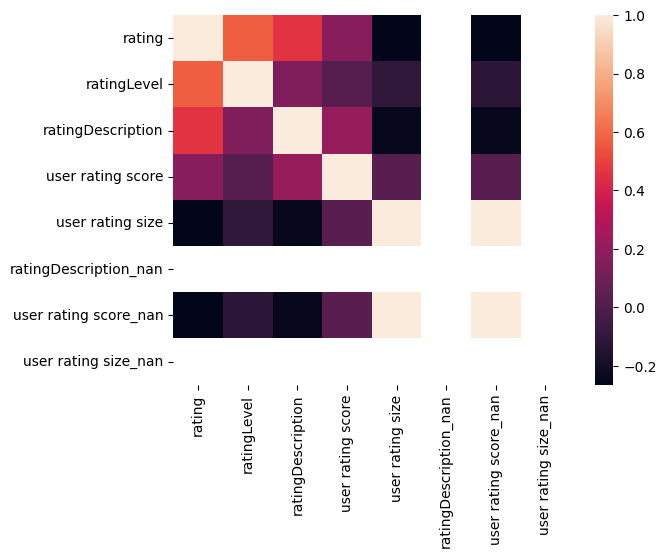

In [ ]:
sns.heatmap(df.corr())
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['rating', 'ratingLevel', 'ratingDescription', 'user rating size',
       'ratingDescription_nan', 'user rating score_nan', 'user rating size_nan']]
y = df['user rating score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
r2s = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
print("r2 score from Linear Regression: ", r2s)
print("mean square error from Linear Regression: ", mse)

r2 score from Linear Regression:  0.022183781261508106
mean square error from Linear Regression:  0.25282204806844355


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_predict2 = xgb.predict(X_test)
r2s2 = r2_score(y_test, y_predict2)
mse2 = mean_squared_error(y_test, y_predict2)
print("r2 score from Linear Regression: ", r2s2)
print("mean square error from Linear Regression: ", mse2)

r2 score from Linear Regression:  0.20979300303753234
mean square error from Linear Regression:  0.20431421318395543


###XGBoost gives a more accurate prediction than Linear Regression